In [22]:
# 酶活性预测实战task:
# 1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上的r2分数，可视化模型预测结果
# 2、加入多项式特征(2次、5次)，建立回归模型
# 3、计算多项式回归模型对测试数据进行预测的x2分数，判断哪个模型预测更准确
# 4、可视化多项式回归模型数据预测结果，判断哪个模型预测更准确

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data_train = pd.read_csv('./AIlearning/T-R-train.csv')

In [23]:
X_train = data_train.loc[:,'T']
Y_train = data_train.loc[:,'rate']

In [24]:
X_train.head

<bound method NDFrame.head of 0     46.53
1     48.14
2     50.15
3     51.36
4     52.57
5     54.18
6     56.19
7     58.58
8     61.37
9     63.34
10    65.31
11    66.47
12    68.03
13    69.97
14    71.13
15    71.89
16    73.05
17    74.21
Name: T, dtype: float64>

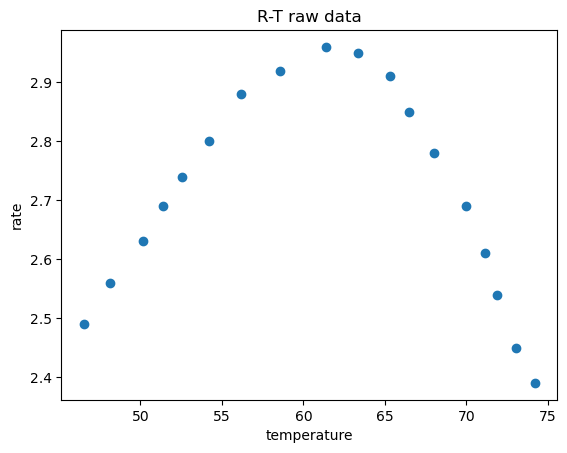

In [25]:
#visualize the data
fig0 = plt.Figure(figsize=(5,5))
plt.scatter(X_train,Y_train,marker='o')
plt.title('R-T raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [26]:
#linear regression model prediction
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)
LR1.fit(X_train,Y_train)

LinearRegression()

In [27]:
#load test data
data_test = pd.read_csv('./AIlearning/T-R-test.csv')
X_test = data_test.loc[:,'T']
Y_test = data_test.loc[:,'rate']

In [28]:
X_test = np.array(X_test).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

In [29]:
#make prediction on the test date
Y_train_predict = LR1.predict(X_train)
Y_test_predict = LR1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(Y_train,Y_train_predict)
r2_test = r2_score(Y_test,Y_test_predict)
print(f'train data r2:{r2_train},test data r2:{r2_test}')

train data r2:0.016665703886981964,test data r2:-0.758336343735132


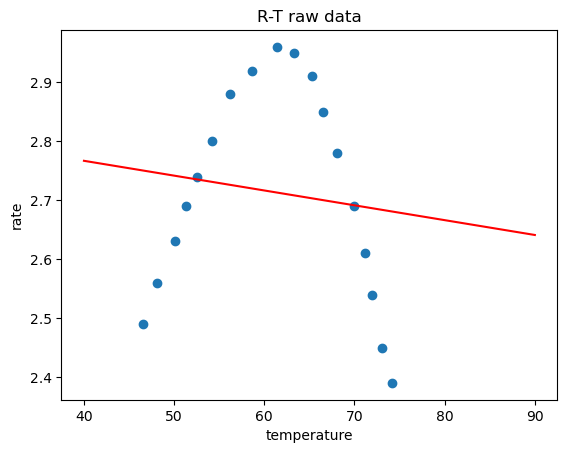

In [30]:
#visualize the data
X_range = np.linspace(40,90,300).reshape(-1,1)
Y_range_predict = LR1.predict(X_range)
fig1 = plt.Figure(figsize=(5,5))
plt.scatter(X_train,Y_train,marker='o')
plt.plot(X_range,Y_range_predict,color='r')
plt.title('R-T raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [31]:
# genertation new features
from sklearn.preprocessing import PolynomialFeatures
ploy2 = PolynomialFeatures(degree=2)
X_2_train = ploy2.fit_transform(X_train)
X_5_test = ploy2.transform(X_test) 

In [32]:
# second order model building
LR2 = LinearRegression()
LR2.fit(X_5_train,Y_train)

LinearRegression()

In [33]:
#make prediction on the test date
Y_5_train_predict = LR2.predict(X_2_train)
Y_2_test_predict = LR2.predict(X_2_test)
r2_2_train = r2_score(Y_train,Y_2_train_predict)
r2_2_test = r2_score(Y_test,Y_2_test_predict)
print(f'train data r2:{r2_2_train},test data r2:{r2_2_test}')

ValueError: X has 3 features, but LinearRegression is expecting 6 features as input.

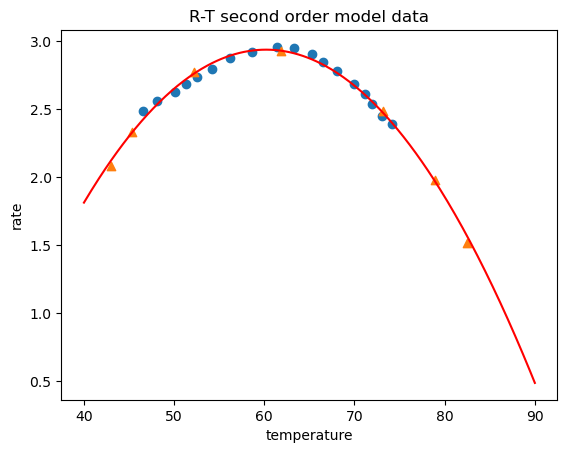

In [ ]:
#visualize the second order mmodel data
X_2_range = ploy2.transform(X_range)
Y_2_range_predict = LR2.predict(X_2_range)
fig2 = plt.Figure(figsize=(5,5))
plt.scatter(X_train,Y_train,marker='o')
plt.scatter(X_test,Y_test,marker='^')
plt.plot(X_range,Y_2_range_predict,color='r')
plt.title('R-T second order model data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [ ]:
#Try to overfit
ploy5 = PolynomialFeatures(degree=5)
X_5_train = ploy5.fit_transform(X_train)
X_5_test = ploy5.transform(X_test) 

In [ ]:
#make prediction on the test date
Y_5_train_predict = LR2.predict(X_5_train)
Y_5_test_predict = LR2.predict(X_5_test)
r2_5_train = r2_score(Y_train,Y_5_train_predict)
r2_5_test = r2_score(Y_test,Y_5_test_predict)
print(f'train data r2:{r2_5_train},test data r2:{r2_5_test}')

train data r2:0.9978527267142803,test data r2:0.543784598216784


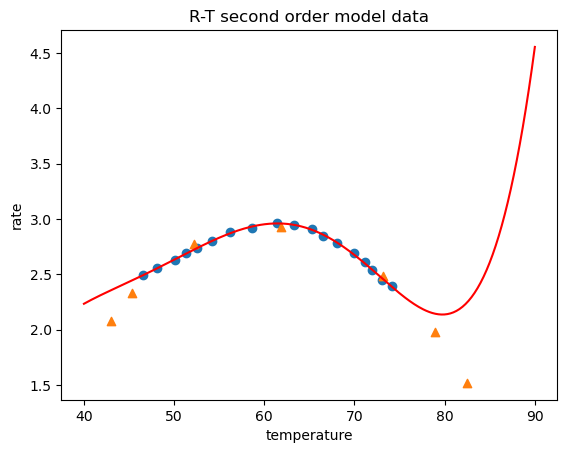

In [34]:
#visualize the second order mmodel data
X_5_range = ploy5.transform(X_range)
Y_5_range_predict = LR2.predict(X_5_range)
fig2 = plt.Figure(figsize=(5,5))
plt.scatter(X_train,Y_train,marker='o')
plt.scatter(X_test,Y_test,marker='^')
plt.plot(X_range,Y_5_range_predict,color='r')
plt.title('R-T second order model data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()